In [1]:
import pandas as pd
import numpy as np
import seaborn as sys
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("DataSets/fifa_2023.csv")

del data["Unnamed: 0"]

data = data.rename(columns={"card_type":"card type"})

data.columns = data.columns.str.title()

data = data.dropna(how="any",axis=0)

data = pd.DataFrame(data,columns=["Name","Card Type","Position","Nation","League","Team","Pac","Sho","Pas","Dri","Def","Phy","Rating"])




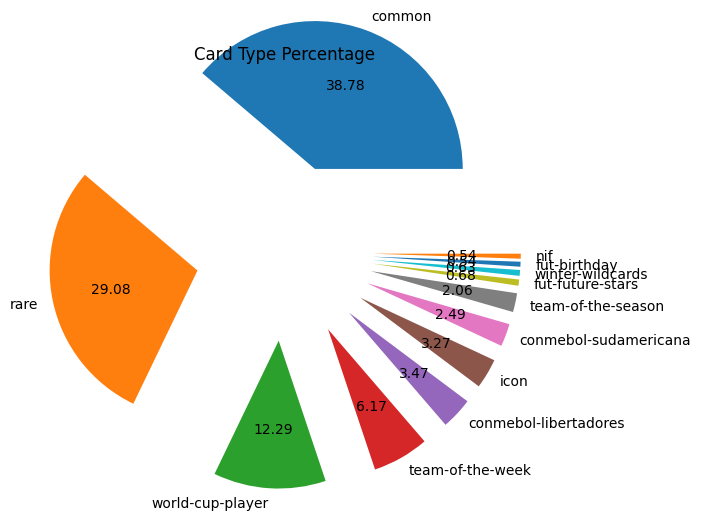

In [3]:
plt.pie(data["Card Type"].value_counts()[:12], labels =data["Card Type"].value_counts()[:12].index,autopct="%.2f",explode=[0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6])

plt.title("Card Type Percentage")

plt.show()
def barshow(colname,number):

    plt.figure(figsize=(17,8))

    plt.bar(data[colname].value_counts()[:number].index,data[colname].value_counts()[:number])
    
    plt.title(colname +" Values Counts")

    plt.xticks(rotation="vertical")

    plt.show()


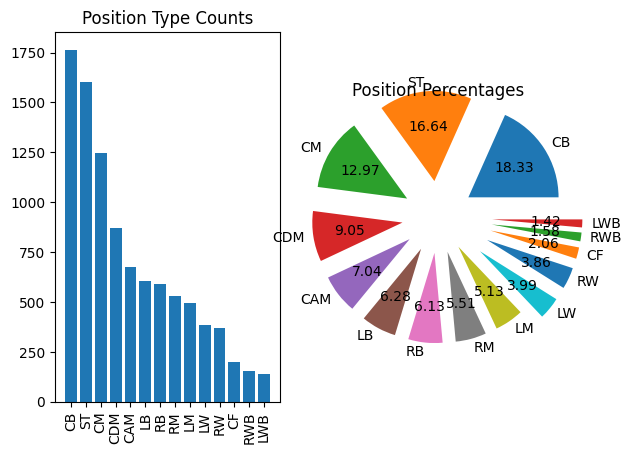

In [4]:
plt.subplot(1,2,1)

plt.bar(data["Position"].value_counts().index,data["Position"].value_counts())

plt.xticks(rotation="vertical")

plt.title("Position Type Counts")

plt.subplot(1,2,2)
plt.pie(data["Position"].value_counts(),labels=data["Position"].value_counts().index,autopct="%.2f",explode=[0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.6])
plt.title("Position Percentages")

plt.show()

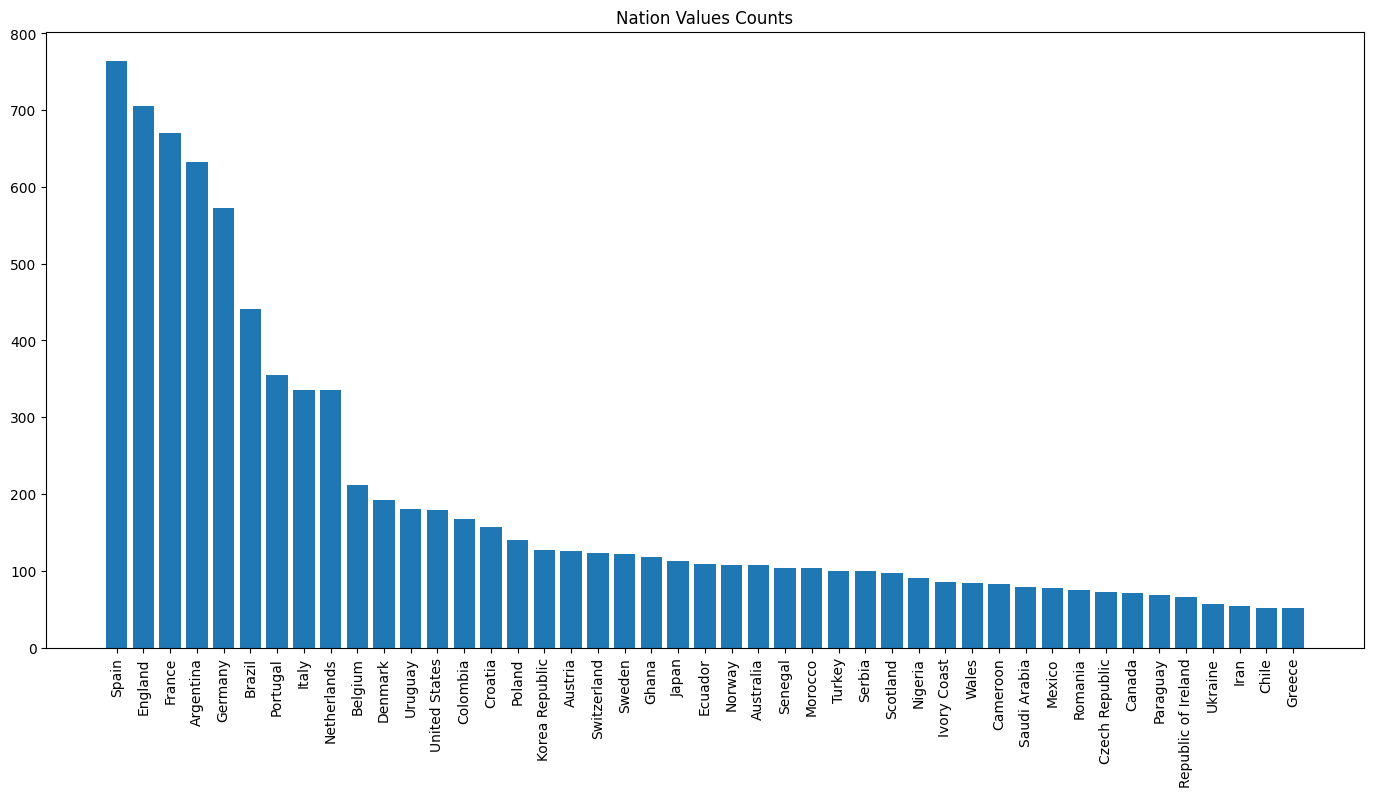

In [5]:



    
barshow("Nation",45)

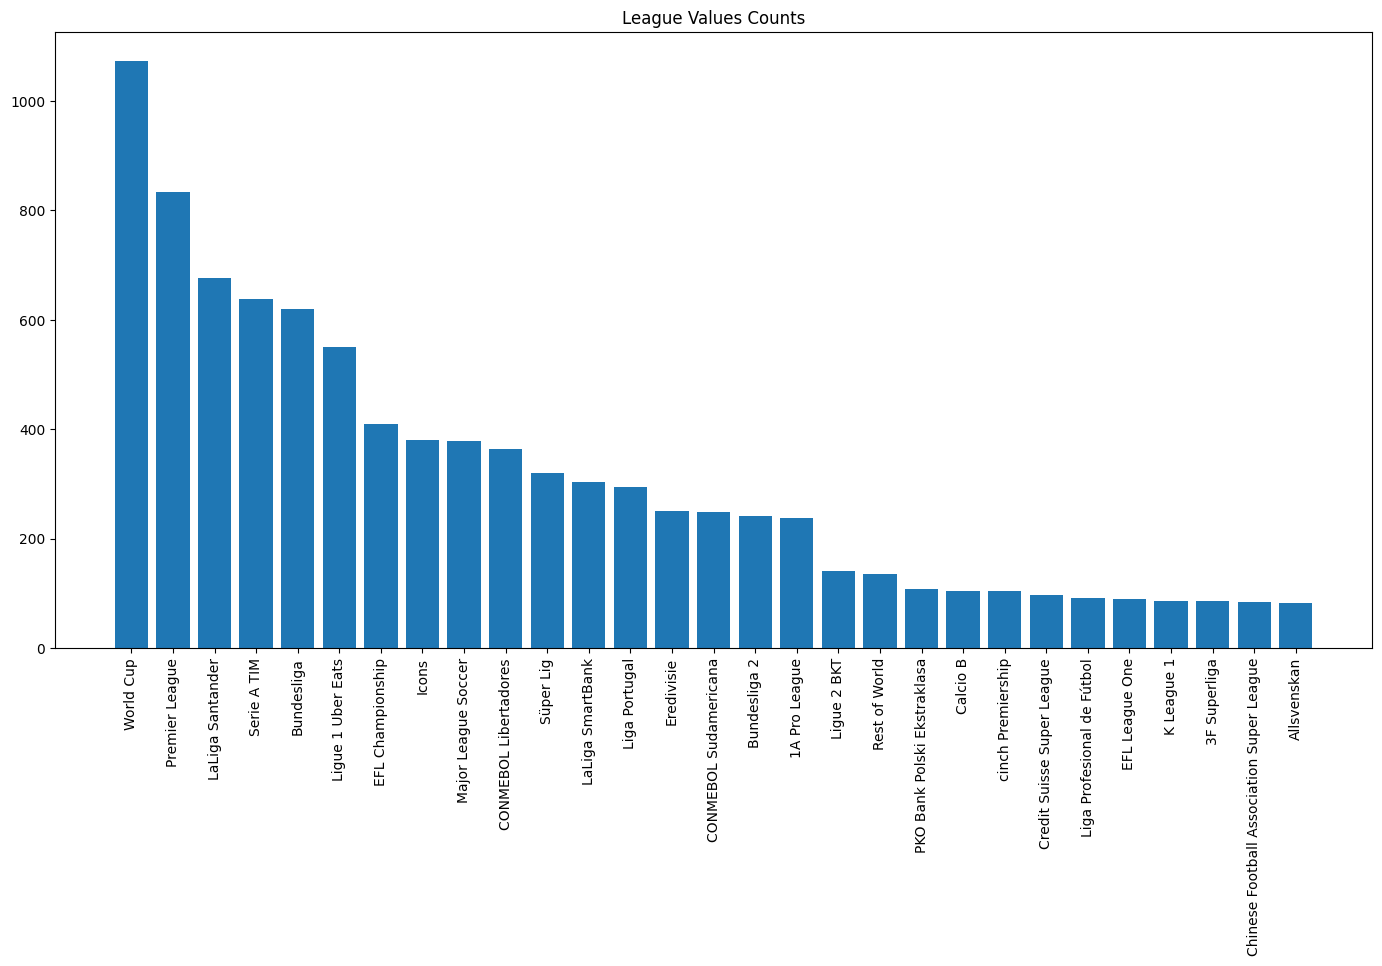

In [6]:
data["League"].value_counts()

barshow("League",29)

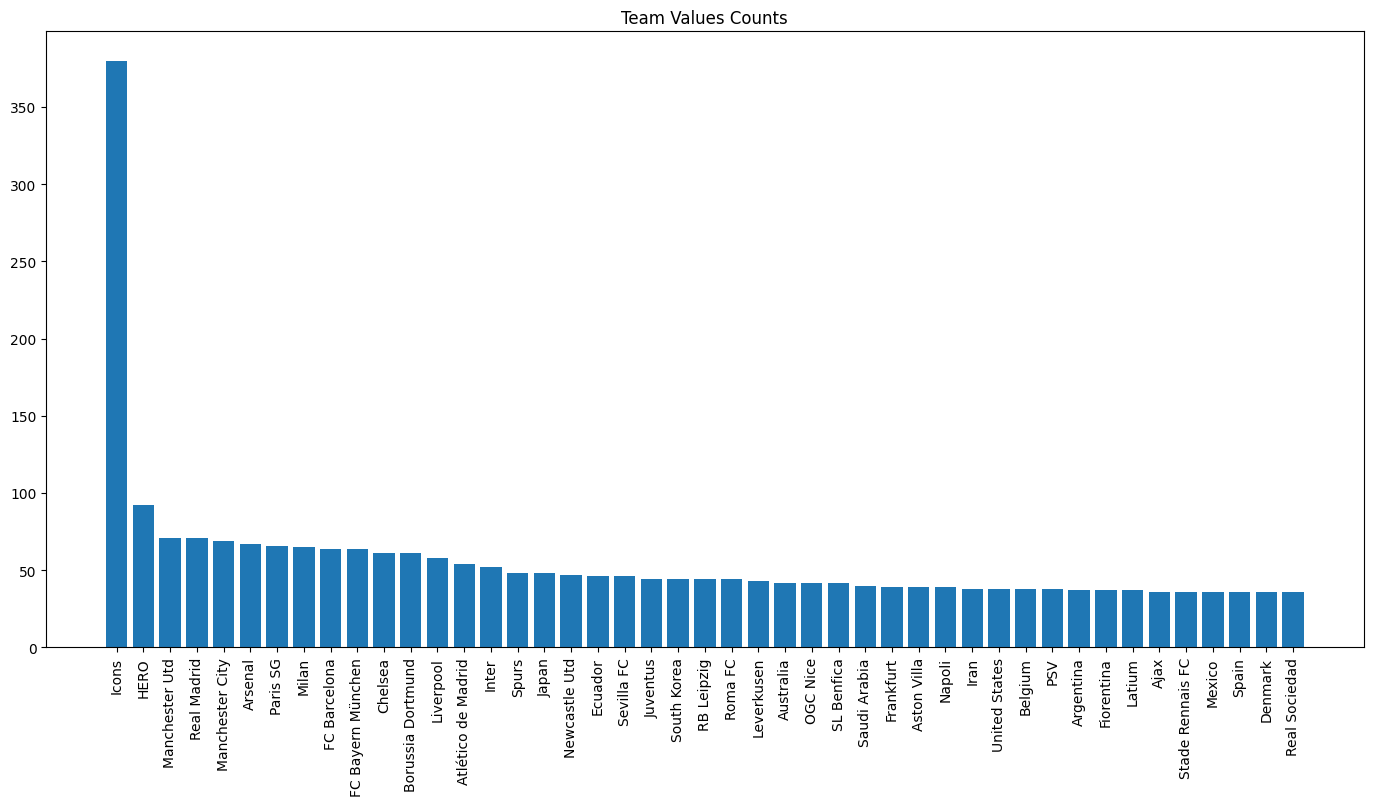

In [7]:
barshow("Team",45)

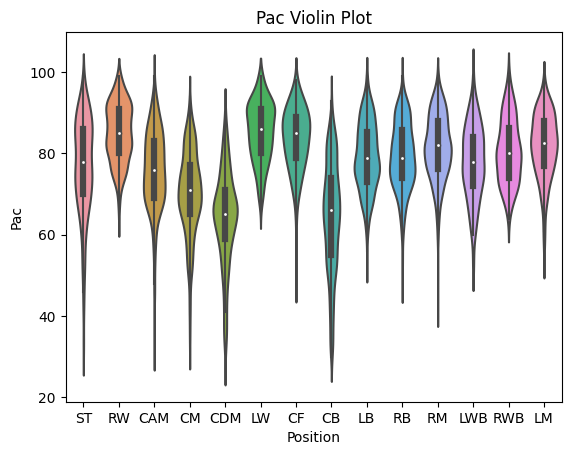

In [8]:
def showviolin(colname,x):
    if x==1:
        sys.violinplot(y=colname,x="Position",data=data)
    
        plt.title(colname + " Violin Plot")
    else:
        sys.boxplot(y=colname,x="Position",data=data)
        
        plt.title(colname + " Violin Plot")
    
    plt.show()
    
showviolin("Pac",1)

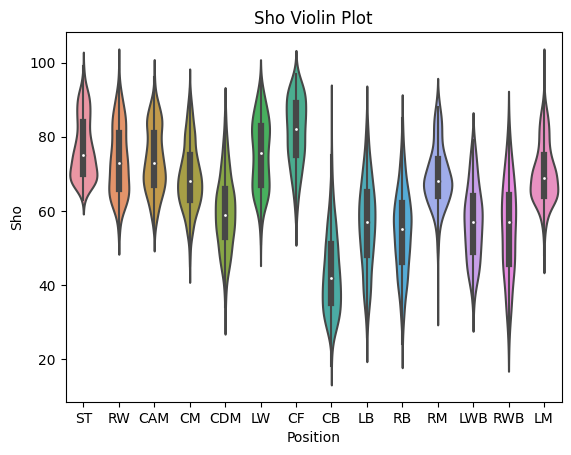

In [9]:
showviolin("Sho",1)

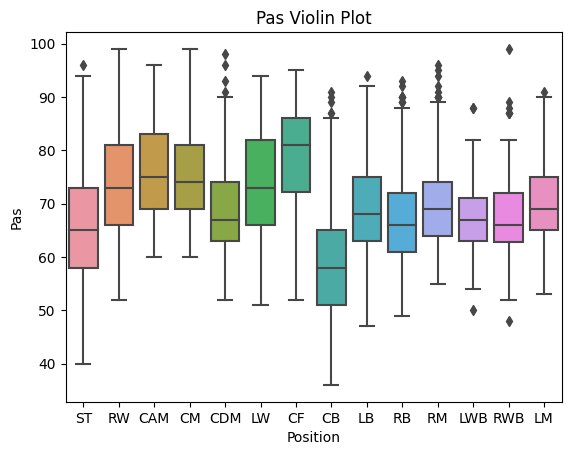

In [10]:

showviolin("Pas",2)

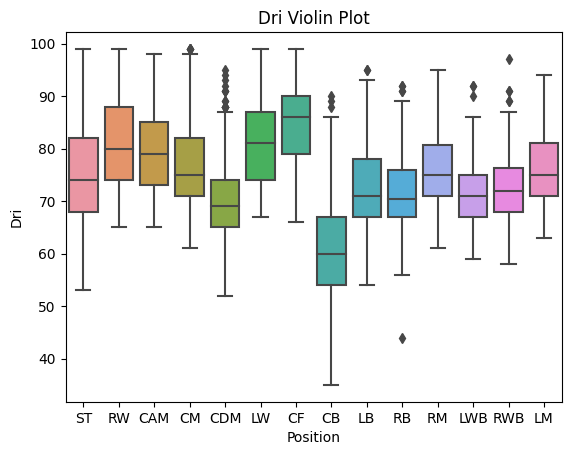

In [11]:
showviolin("Dri",2)

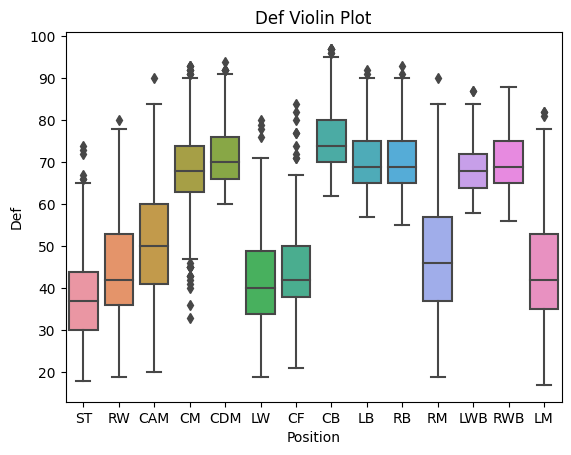

In [12]:
showviolin("Def",2)

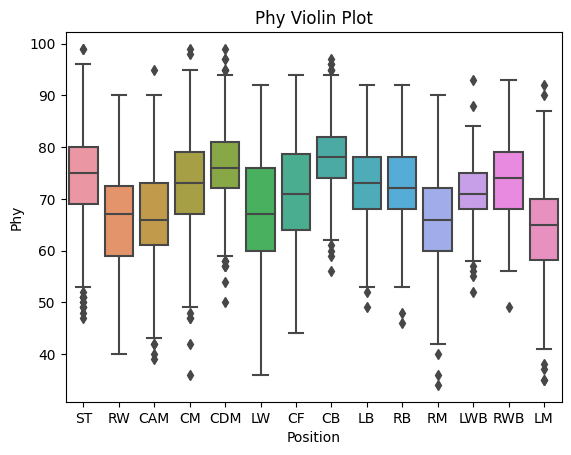

In [13]:
showviolin("Phy",2)

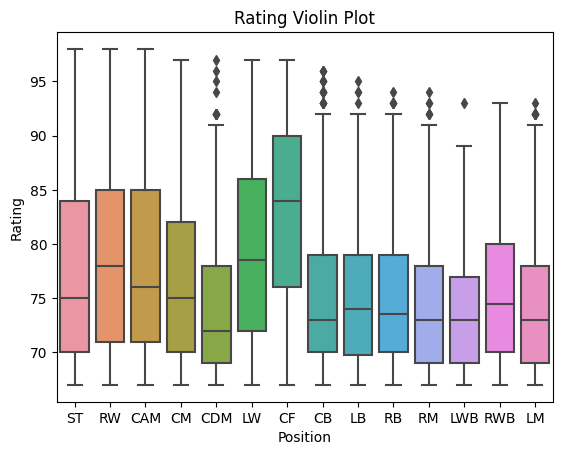

In [14]:
showviolin("Rating",2)


In [15]:

for i in ["Pac","Sho","Pas","Dri","Def","Phy","Rating"]:
    
    data[i] = MinMaxScaler().fit_transform(data[[i]])

X = data[["Pac","Sho","Pas","Dri","Def","Phy"]].to_numpy()

Y = data[["Rating"]].to_numpy()

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)



In [16]:
model = LinearRegression()

model.fit(Xtrain,Ytrain)

prediction = model.predict(Xtest)

prediction

from sklearn.metrics import mean_absolute_error,r2_score

print(r2_score(Ytest,prediction))

print(mean_absolute_error(Ytest,prediction))




              
              

0.7753040711336221
0.092268073986716
